# 3.线性回归模型

#### 3.1.1.4 小批量梯度下降
在每次需要计算更新的时候随机抽取一小批样本，进行小批量随机梯度下降

## 3.2 线性回归 手动实现

In [1]:
import random
import torch
from d2l import torch as d2l
%matplotlib inline

### 3.2.1 生成数据集

In [13]:
def synthetic_data(b, w, num_examples):
    X = torch.normal(0 ,1, (num_examples, len(w)))
    #返回一个张量,均值是0，平均数是1的正态分布
    y = torch.matmul(X, w) + b#这里不能用mm
    print(X.shape, w.shape)
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

In [15]:
true_b = 4.2
true_w = torch.tensor([2, -3.4])
features, labels = synthetic_data(true_b, true_w, 1000)


torch.Size([1000, 2]) torch.Size([2])


注意 features每一行都包含一个二维数据样本 labels每一行都包含一个标量

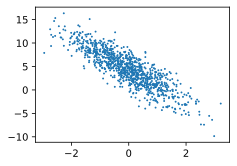

In [17]:
d2l.set_figsize()
d2l.plt.scatter(features[:, (1)].detach().numpy(), labels.detach().numpy(), 1)

### 3.2.2 读取数据集


In [23]:
def data_iter(batch_size, featurs, labels):
    num_examples = len(featurs)
    indices = list(range(num_examples))
    #print(indices)
    random.shuffle(indices)#随机打乱列表中的元素
    #print(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i : min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

In [24]:
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 1.0718, -1.4771],
        [-0.0112, -0.6983],
        [ 1.4385, -0.0880],
        [-0.0851, -1.0240],
        [ 1.2374, -0.6048],
        [ 0.1956,  0.1081],
        [-0.5784, -0.6976],
        [-1.0212,  1.0230],
        [ 1.0374, -0.2737],
        [-0.0291,  0.4537]]) 
 tensor([[11.3709],
        [ 6.5463],
        [ 7.3956],
        [ 7.4965],
        [ 8.7551],
        [ 4.2202],
        [ 5.4162],
        [-1.3195],
        [ 7.2120],
        [ 2.6056]])


### 3.2.3 初始化模型参数

In [25]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 3.2.4 定义线性回归模型

In [26]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

### 3.2.5定义损失函数

In [27]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 3.2.6定义优化算法

In [28]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 3.2.7训练

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.027126
epoch 2, loss 0.000096
epoch 3, loss 0.000050


In [30]:
print(w, b)

tensor([[ 2.0006],
        [-3.4002]], requires_grad=True) tensor([4.2001], requires_grad=True)
